# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
#!pip install --upgrade geoplot
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np


# Import Datasets From Google Drive

In [ ]:
df_2016 =pd.read_csv("drive/My Drive/Learning/Colab Notebooks/Zillow/Data Sets/properties_2016.csv")
df_train_2016 =pd.read_csv("drive/My Drive/Learning/Colab Notebooks/Zillow/Data Sets/train_2016_v2.csv", parse_dates=["transactiondate"])

<ipython-input-3-55291aee68b1>:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016 =pd.read_csv("drive/My Drive/Learning/Colab Notebooks/Zillow/Data Sets/properties_2016.csv")


# EDA - 2016

In [ ]:
print(df_2016.shape)
display(df_2016.head())


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [ ]:
df_2016.isnull().sum() #Count Missing Values in DataFrame

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [ ]:
def drop_columns(data_series):
  missing_value_df = pd.DataFrame((data_series.isnull().sum()/len(data_series))*100,
                               columns =["missing_value"])
  drop_columns_list = missing_value_df.loc[missing_value_df["missing_value"]>50].index.to_list()
  return drop_columns_list


In [ ]:
display(drop_columns(df_2016))

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

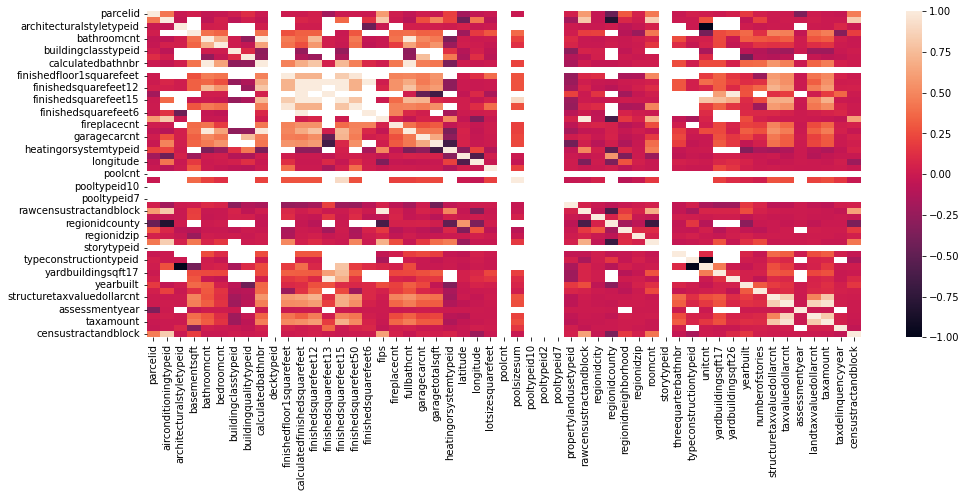

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_2016.corr());

In [ ]:
df_2016['regionidzip'].nunique()

405

In [ ]:
print(df_train_2016.shape)
display(df_train_2016.head())

(90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [ ]:
display(df_train_2016.describe())

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


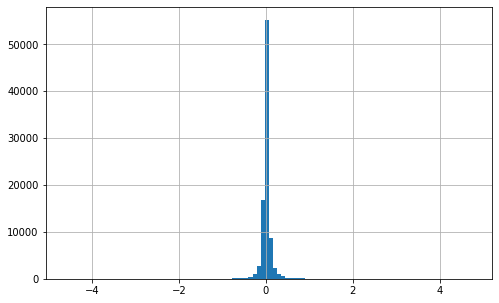

In [ ]:
df_train_2016.logerror.hist(bins=100, figsize=(8,5))
plt.show()

<Figure size 576x432 with 0 Axes>

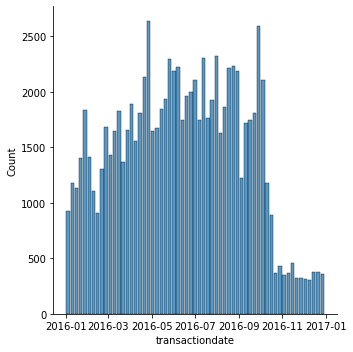

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(df_train_2016, x="transactiondate", shrink=.8)

In [ ]:
(df_train_2016['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

<Figure size 576x432 with 0 Axes>

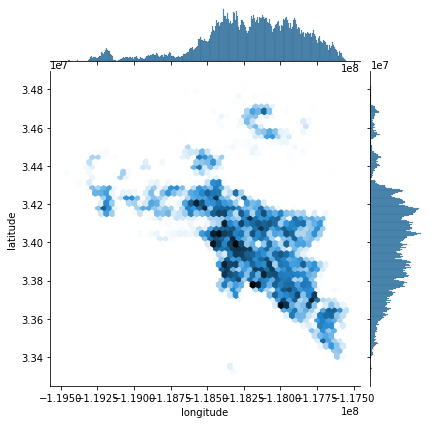

In [ ]:
plt.figure(figsize=(8,6))
sns.jointplot(x = "longitude", y = "latitude",
              kind = "hex", data = df_2016)
# show the plot
plt.show()


#Data Frame Merge 2016

In [ ]:
#identify duplicate rows in 'team' column
duplicateRows = df_train_2016[df_train_2016.duplicated(['parcelid'])]

#view duplicate rows
print(duplicateRows)

       parcelid  logerror transactiondate
497    13850164   -0.0460      2016-06-29
782    14677191   -0.0845      2016-09-12
814    11005771    0.0545      2016-06-17
968    11183209   -0.0070      2016-09-14
1165   11554091   -0.0954      2016-07-05
...         ...       ...             ...
60390  12042403    0.0060      2016-09-30
62319  13858886    0.3443      2016-10-11
74547  11419032   -0.0040      2016-12-29
78230  17128287    0.0090      2016-11-04
80674  14367791    2.1240      2016-09-30

[125 rows x 3 columns]


In [ ]:
train_2016 = df_train_2016.drop_duplicates(subset=['parcelid'])
print(train_2016.shape)

(90150, 3)


In [ ]:
housing_2016 = pd.merge(train_2016, df_2016, on='parcelid', how='left')
housing_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [ ]:
print (housing_2016.dtypes)
print (housing_2016.shape)

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

# Review and drop outliers & variables

Dropping outliers based on Three-Sigma Limit

Reference: https://www.investopedia.com/terms/t/three-sigma-limits.asp#:~:text=What%20Is%20a%20Three%2DSigma,items%20of%20the%20highest%20quality.

In [ ]:
#highest_threshold = train_2016.logerror.mean()+3*train_2016.logerror.std()
#lowest_threshold = train_2016.logerror.mean()-3*train_2016.logerror.std()
#print(highest_threshold)
#print(lowest_threshold)


In [ ]:
#housing_2016 = housing_2016[housing_2016.logerror > lowest_threshold]
#housing_2016 = housing_2016[housing_2016.logerror < highest_threshold]

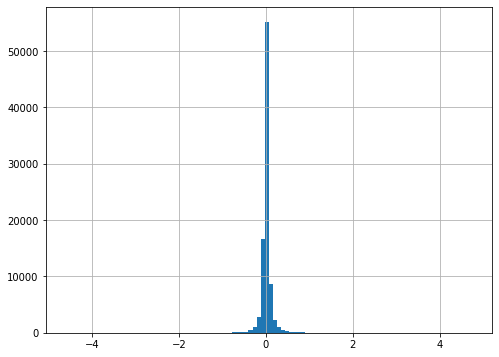

(90150, 60)

In [ ]:
housing_2016.logerror.hist(bins=100, figsize=(8,6))
plt.show()
housing_2016.shape

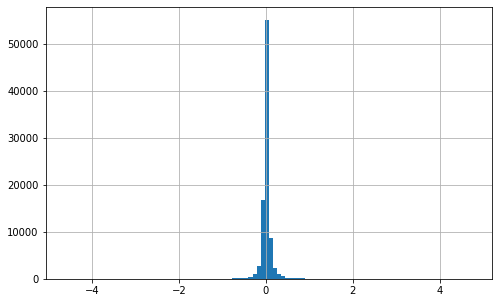

(90150,)

In [ ]:
train_2016.logerror.hist(bins=100, figsize=(8,5))
plt.show()
train_2016.logerror.shape

In [ ]:
housing_2016 = housing_2016.drop(columns=['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'buildingqualitytypeid',
 'heatingorsystemtypeid',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'roomcnt',
 'unitcnt',
 'structuretaxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'censustractandblock',
 'calculatedbathnbr',
 'finishedsquarefeet12',
 'taxamount',
 'transactiondate'])

print(housing_2016.shape)

(90150, 15)


In [ ]:
pd.set_option('display.max_columns', None)
housing_2016.head()

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt
0,11016594,0.0276,2.0,3.0,1684.0,6037.0,2.0,34280990.0,-118488536.0,7528.0,12447.0,3101.0,96370.0,1959.0,360170.0
1,14366692,-0.1684,3.5,4.0,2263.0,6059.0,3.0,33668120.0,-117677556.0,3643.0,32380.0,1286.0,96962.0,2014.0,585529.0
2,12098116,-0.0040,3.0,2.0,2217.0,6037.0,3.0,34136312.0,-118175032.0,11423.0,47019.0,3101.0,96293.0,1940.0,119906.0
3,12643413,0.0218,2.0,2.0,839.0,6037.0,2.0,33755800.0,-118309000.0,70859.0,12447.0,3101.0,96222.0,1987.0,244880.0
4,14432541,-0.0050,2.5,4.0,2283.0,6059.0,2.0,33485643.0,-117700234.0,6000.0,17686.0,1286.0,96961.0,1981.0,434551.0


In [ ]:
housing_2016.isnull().sum()



parcelid                            0
logerror                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      658
fips                                0
fullbathcnt                      1176
latitude                            0
longitude                           0
lotsizesquarefeet               10136
regionidcity                     1801
regionidcounty                      0
regionidzip                        35
yearbuilt                         753
taxvaluedollarcnt                   1
dtype: int64

In [ ]:
print(housing_2016.shape)

(90150, 15)


In [ ]:
housing_2016['logerror'] = housing_2016['logerror']
housing_2016
housing_2016['logerror'] = housing_2016['logerror']
print (housing_2016.dtypes)

parcelid                          int64
logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
yearbuilt                       float64
taxvaluedollarcnt               float64
dtype: object


In [ ]:
housing_2016_2 = housing_2016

# Replacing null value

In [ ]:
#Replace null value with mean
housing_2016['calculatedfinishedsquarefeet'] = housing_2016['calculatedfinishedsquarefeet'].fillna(housing_2016['calculatedfinishedsquarefeet'].mean())
housing_2016['fullbathcnt'] = housing_2016['fullbathcnt'].fillna(housing_2016['fullbathcnt'].mean())



In [ ]:
#kNN Imputation for Missing Values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

imputer = KNNImputer(n_neighbors=5)
housing_2016 = pd.DataFrame(imputer.fit_transform(housing_2016),columns = housing_2016.columns)


In [ ]:
housing_2016.isnull().sum()

parcelid                        0
logerror                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
yearbuilt                       0
taxvaluedollarcnt               0
dtype: int64

#Split Train and Test


In [ ]:
from sklearn.model_selection import train_test_split

X = housing_2016.drop(['parcelid','logerror'], axis=1)
#X = housing_2016[['bathroomcnt','fullbathcnt']]
y = housing_2016[['logerror']]
#y = housing_2016[['logerror']].astype('str')


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_test
print (X_test.dtypes)
print(X_test.shape)
print(X_train.shape)

bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
yearbuilt                       float64
taxvaluedollarcnt               float64
dtype: object
(29750, 13)
(60400, 13)


In [ ]:
y_train
print (y_train.dtypes)
#print(y_train.shape)


logerror    float64
dtype: object


# Model - Decision Trees Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
#tree_clf.fit(X_train, y_train)

In [ ]:
# Visualize the trained Decision Tree by export_graphviz() method

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#labels = X.columns

#graph = Source(tree.export_graphviz(tree_clf ,feature_names = labels, class_names = y['logerror'].unique(), max_depth = 2, filled = True))
#display(SVG(graph.pipe(format='svg')))

#graph = Source(tree.export_graphviz(tree_clf ,feature_names = labels, max_depth = 2, filled = True))
#display(SVG(graph.pipe(format='svg')))

In [ ]:
#tree_clf.predict_proba([[2.0, 3.0, 1684.0, 6037.0, 2.0, 34280990.0, -118488536.0, 7528.0, 12447.0, 3101.0, 96370.0, 1959.0, 360170.0]])

In [ ]:
#tree_clf.predict([[2.0, 3.0, 1684.0, 6037.0, 2.0, 34280990.0, -118488536.0, 7528.0, 12447.0, 3101.0, 96370.0, 1959.0, 360170.0]])

# Model - Decision Trees Regression Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


In [ ]:
#evaluate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error(y_test, y_1)
MSE = mean_squared_error(y_test,y_1)
R2 = r2_score(y_test,y_1)

MAE_2 = mean_absolute_error(y_test, y_2)
MSE_2 = mean_squared_error(y_test,y_2)
R2_2 = r2_score(y_test,y_2)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("R2 = {}".format(R2))


print("MAE_2 = {}".format(MAE_2))
print("MSE_2 = {}".format(MSE_2))
print("R2_2 = {}".format(R2_2))

MAE = 0.06833834238219655
MSE = 0.02638453432256469
R2 = -0.012081005318947957
MAE_2 = 0.06847536642485536
MSE_2 = 0.027018051148108572
R2_2 = -0.03638199687120647


## Parameter
### criterion
### max_depth
### min_samples_split
### min_samples_leaf

In [ ]:
from sklearn.model_selection import cross_val_score

#ScoreAll = []
#for i in range(10,100,10):
#    DT = DecisionTreeClassifier(max_depth = i,random_state = 66)
#    score = cross_val_score(DT,X_train,y_train,cv=10).mean()
#    ScoreAll.append([i,score])
#ScoreAll = np.array(ScoreAll)

#max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
#print("Best max_depth",ScoreAll[max_score])
# print(ScoreAll[,0])
#plt.figure(figsize=[20,5])
#plt.plot(ScoreAll[:,0],ScoreAll[:,1])
#plt.show()

# Model - Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split

X = housing_2016.drop(['parcelid','logerror'], axis=1)
#X = housing_2016[['bathroomcnt','fullbathcnt']]
y = housing_2016[['logerror']]
#y = housing_2016[['logerror']].astype('str')

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[5,10,15],'n_jobs':[-1],'oob_score':[False]}  # this can be extended
model = RandomForestRegressor()
grid = GridSearchCV(model,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3)
grid.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [5, 10, 15], 'n_jobs': [-1],
                         'oob_score': [False]},
             scoring='neg_mean_absolute_error')

  param_n_estimators  mean_test_score  std_test_score
0                  5        -0.088900        0.000796
1                 10        -0.083176        0.000564
2                 15        -0.080553        0.000445


<Axes: xlabel='feat'>

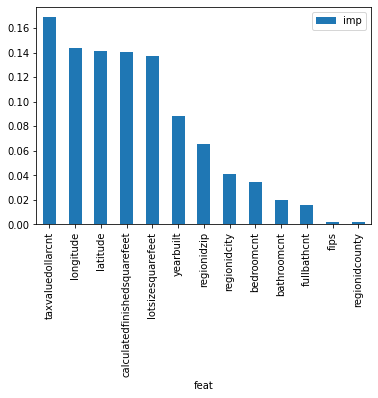

In [ ]:
cv_results = pd.DataFrame(grid.cv_results_)
print(cv_results[["param_n_estimators","mean_test_score","std_test_score"]])

feat_imps = grid.best_estimator_.feature_importances_
fi = pd.DataFrame.from_dict({'feat':X_train.columns,'imp':feat_imps})
fi.set_index('feat',inplace=True,drop=True)
fi = fi.sort_values('imp',ascending=False)
fi.head(20).plot.bar()

In [ ]:
rf = RandomForestRegressor(n_estimators=30,max_depth=100,random_state=42,max_features=5)#,criterion='mae')
rf.fit(X_train, y_train)

<ipython-input-48-acae02345720>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=100, max_features=5, n_estimators=30,
                      random_state=42)

In [ ]:
y_3=rf.predict(X_test)

In [ ]:
MAE_3 = mean_absolute_error(y_test, y_3)
MSE_3 = mean_squared_error(y_test,y_3)
R2_3 = r2_score(y_test,y_3)

print("MAE = {}".format(MAE_3))
print("MSE = {}".format(MSE_3))
print("R2 = {}".format(R2_3))

MAE = 0.07708278965901917
MSE = 0.027994632344326892
R2 = -0.07384255110198312


##Imputation of missing values

In [ ]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
housing_2016_2 = pd.merge(train_2016, df_2016, on='parcelid', how='left')

display(housing_2016_2)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90145,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,1.0,NaN,NaN,653.0,653.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,34203000.0,-118562000.0,93676.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LARD1.5,6.037132e+07,12447.0,3101.0,40548.0,96364.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1979.0,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90146,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,2856.0,2856.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34198744.0,-118224849.0,9343.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,GLR1RY,6.037301e+07,45457.0,3101.0,274580.0,96327.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1965.0,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90147,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,NaN,NaN,2617.0,NaN,NaN,2617.0,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,NaN,34075655.0,-118025537.0,6865.0,NaN,NaN,NaN,NaN,NaN,0200,246.0,EMR3YY,6.037433e+07,51861.0,3101.0,NaN,96478.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1924.0,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+1

In [ ]:
print(housing_2016_2.dtypes)

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

In [ ]:
display(housing_2016_2)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90145,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,1.0,NaN,NaN,653.0,653.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,34203000.0,-118562000.0,93676.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LARD1.5,6.037132e+07,12447.0,3101.0,40548.0,96364.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1979.0,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90146,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,2856.0,2856.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34198744.0,-118224849.0,9343.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,GLR1RY,6.037301e+07,45457.0,3101.0,274580.0,96327.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1965.0,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90147,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,NaN,NaN,2617.0,NaN,NaN,2617.0,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,NaN,34075655.0,-118025537.0,6865.0,NaN,NaN,NaN,NaN,NaN,0200,246.0,EMR3YY,6.037433e+07,51861.0,3101.0,NaN,96478.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1924.0,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+1

In [ ]:
housing_2016_2 = housing_2016_2.drop(columns=['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'buildingqualitytypeid',
 'heatingorsystemtypeid',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'roomcnt',
 'unitcnt',
 'structuretaxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'censustractandblock',
 'calculatedbathnbr',
 'finishedsquarefeet12',
 'taxamount',
 'transactiondate'])

print(housing_2016_2.shape)

(90150, 15)


In [ ]:
numericals = [x for x in housing_2016_2.columns]

print(numericals.pop(0))
print(numericals.pop(0))

print(numericals)

parcelid
logerror
['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

seed = 1947

X = housing_2016_2.drop(['parcelid','logerror'], axis=1)
y = housing_2016_2[['logerror']]

# Run imputation on numerical and categorical data
imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                               initial_strategy='mean',
                               max_iter=2, random_state=seed)

X[numericals] = imp_num.fit_transform(X[numericals])

display(X)

/usr/local/lib/python3.9/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt
0,2.0,3.0,1684.0,6037.0,2.0,34280990.0,-118488536.0,7528.0,12447.0,3101.0,96370.0,1959.0,360170.0
1,3.5,4.0,2263.0,6059.0,3.0,33668120.0,-117677556.0,3643.0,32380.0,1286.0,96962.0,2014.0,585529.0
2,3.0,2.0,2217.0,6037.0,3.0,34136312.0,-118175032.0,11423.0,47019.0,3101.0,96293.0,1940.0,119906.0
3,2.0,2.0,839.0,6037.0,2.0,33755800.0,-118309000.0,70859.0,12447.0,3101.0,96222.0,1987.0,244880.0
4,2.5,4.0,2283.0,6059.0,2.0,33485643.0,-117700234.0,6000.0,17686.0,1286.0,96961.0,1981.0,434551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90145,1.0,1.0,653.0,6037.0,1.0,34203000.0,-118562000.0,93676.0,12447.0,3101.0,96364.0,1979.0,191000.0
90146,3.0,3.0,2856.0,6037.0,3.0,34198744.0,-118224849.0,9343.0,45457.0,3101.0,96327.0,1965.0,161111.0
90147,2.0,4.0,2617.0,6037.0,2.0,34075655.0,-118025537.0,6865.0,51861.0,3101.0,96478.0,1924.0,38096.0
90148,2.0,2.0,1034.0,6037.0,2.0,33963900.0,-118367000.0,20033.0,45888.0,3101.0,96133.0,1981.0,165869.0


In [ ]:
print(X.dtypes)

bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
yearbuilt                       float64
taxvaluedollarcnt               float64
dtype: object


In [ ]:
#X = X[['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','fips','fullbathcnt','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidzip','yearbuilt','taxvaluedollarcnt']].astype('Int64')

In [ ]:
from sklearn.model_selection import train_test_split

split_randonstate = 1947
model_randonstate = 1949

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
parameters = {'n_estimators':[5,10,15],'n_jobs':[-1],'oob_score':[False]}  # this can be extended
model = RandomForestRegressor()
grid = GridSearchCV(model,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3)
grid.fit(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [5, 10, 15], 'n_jobs': [-1],
                         'oob_score': [False]},
             scoring='neg_mean_absolute_error')

In [ ]:
rf = RandomForestRegressor(n_estimators=30,max_depth=100,random_state=42,max_features=5)#,criterion='mae')
rf.fit(X_train, y_train)

<ipython-input-61-acae02345720>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=100, max_features=5, n_estimators=30,
                      random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_4 = rf.predict(X_test)

MAE_4 = mean_absolute_error(y_test, y_4)
MSE_4 = mean_squared_error(y_test,y_4)
R2_4 = r2_score(y_test,y_4)

print("MAE = {}".format(MAE_3))
print("MSE = {}".format(MSE_3))
print("R2 = {}".format(R2_3))


print("MAE = {}".format(MAE_4))
print("MSE = {}".format(MSE_4))
print("R2 = {}".format(R2_4))


MAE = 0.07708278965901917
MSE = 0.027994632344326892
R2 = -0.07384255110198312
MAE = 0.07701811521270731
MSE = 0.027663587073690925
R2 = -0.06114402755727166
